# Astronomical Time Series Data

In [28]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use(['seaborn-v0_8-whitegrid', 'assets/class.mplstyle'])


# Part 1: Periodic models

Text(0, 0.5, 'amplitude')

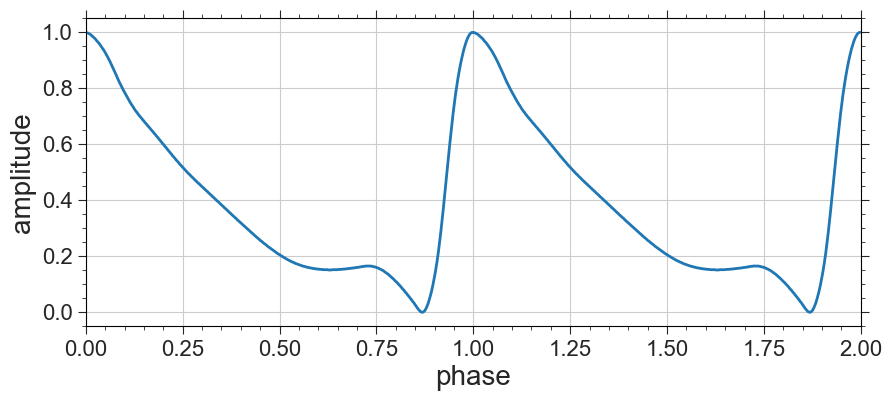

In [29]:
from scipy import fftpack
from astroML.datasets import fetch_rrlyrae_templates

templates = fetch_rrlyrae_templates()
x, y = templates['115r'].T
y = 1-y

phase = np.append(x,1+x)
amp = np.append(y,y)

fig,ax=plt.subplots()
ax.plot(phase,amp)
ax.set_xlim([0,2])
ax.set_xlabel('phase')
ax.set_ylabel('amplitude')

We can use FFTs to quickly calculate the Fourier modes of the data:

Text(0, 0.5, 'amplitude')

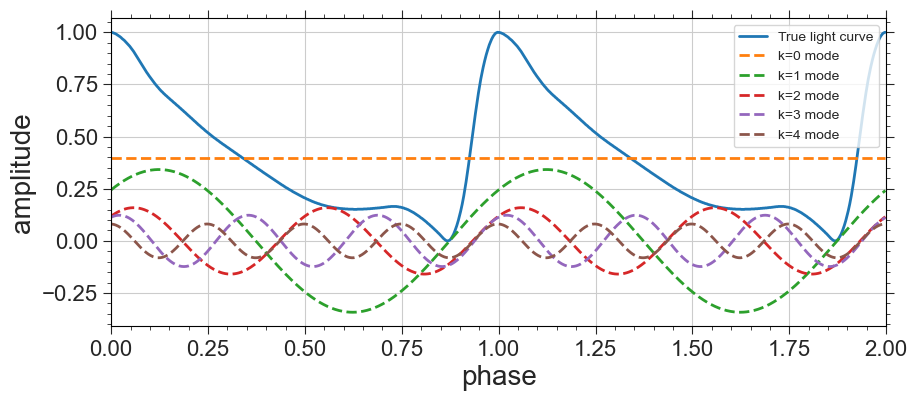

In [30]:
fig,ax=plt.subplots()
ax.plot(phase,amp,label='True light curve')

for k in range(5):
    y_fft = fftpack.fft(y) # compute the Fourier transform
    y_k = np.zeros(y_fft.shape,dtype=np.complex_) # zero out components other than kth component
    y_k[k] = y_fft[k]
    y_k[-k] = y_fft[-k]
    y_fit = fftpack.ifft(y_k).real # compute the amplitudes from the kth Fourier component

    k_amp = np.append(y_fit,y_fit)
    ax.plot(phase,k_amp,ls='--',label=f'k={k} mode')

ax.legend()
ax.set_xlim([0,2])
ax.set_xlabel('phase')
ax.set_ylabel('amplitude')


Text(0, 0.5, 'PSD(k)')

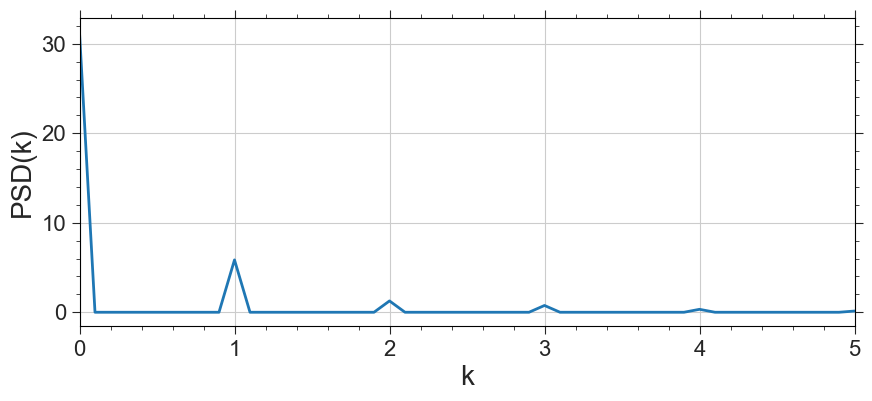

In [31]:
from astroML.fourier import PSD_continuous

def repeat_lightcurve(x,y,n,dx=1):

    newx = []
    for i in range(n):
        newx.append(np.asarray(x)+i)
    newy = list(y) * n
    return np.asarray(newx).flatten(),np.asarray(newy)

x_rpt,y_rpt = repeat_lightcurve(x,y,10)
fk, PSD = PSD_continuous(x_rpt,y_rpt)

fig,ax=plt.subplots()
ax.plot(fk,PSD)
ax.set_xlim([0,5])
ax.set_xlabel('k')
ax.set_ylabel('PSD(k)')


Text(0, 0.5, 'amplitude')

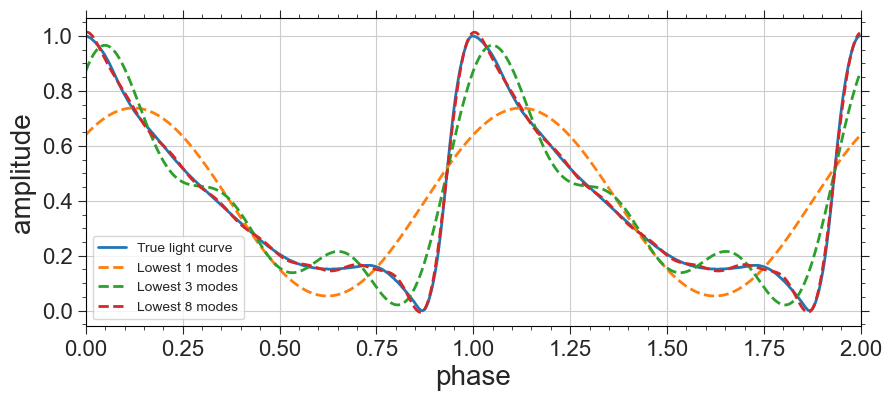

In [32]:
fig,ax=plt.subplots()
ax.plot(phase,amp,label='True light curve')

for k in [1,3,8]:
    y_fft = fftpack.fft(y) # compute the Fourier transform
    y_fft[k + 1:-k] = 0 # zero-out frequencies higher than k
    y_fit = fftpack.ifft(y_fft).real # compute the amplitudes from the truncated series

    trunc_amp = np.append(y_fit,y_fit)
    ax.plot(phase,trunc_amp,ls='--',label=f'Lowest {k} modes')

ax.legend()
ax.set_xlim([0,2])
ax.set_xlabel('phase')
ax.set_ylabel('amplitude')


## Power Spectral Distribution (PSD)

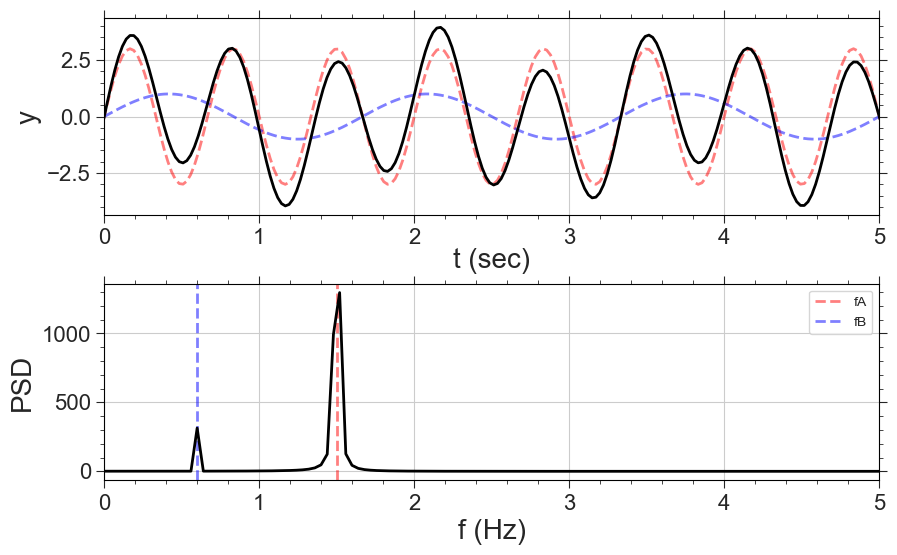

In [33]:
t = np.linspace(-10,15,1024)
fA = 1.5
yA = np.sin(2*np.pi*fA*t)
fB = 0.6
yB = np.sin(2*np.pi*fB*t)

y = 3*yA + 1*yB
fk, PSD = PSD_continuous(t,y)

fig,axs=plt.subplots(nrows=2,figsize=(10,6))
axs[0].plot(t,3*yA,'r--',alpha=0.5)
axs[0].plot(t,1*yB,'b--',alpha=0.5)
axs[0].plot(t,y,'k-')
axs[0].set_xlabel('t (sec)',labelpad=0)
axs[0].set_ylabel('y')
axs[0].set_xlim([0,5])

axs[1].axvline(fA,color='r',ls='--',label='fA',alpha=0.5)
axs[1].axvline(fB,color='b',ls='--',label='fB',alpha=0.5)
axs[1].plot(fk,PSD,'k-')
axs[1].set_xlabel('f (Hz)')
axs[1].set_ylabel('PSD') 
axs[1].set_xlim([0,5])
axs[1].legend()
fig.subplots_adjust(hspace=0.35)

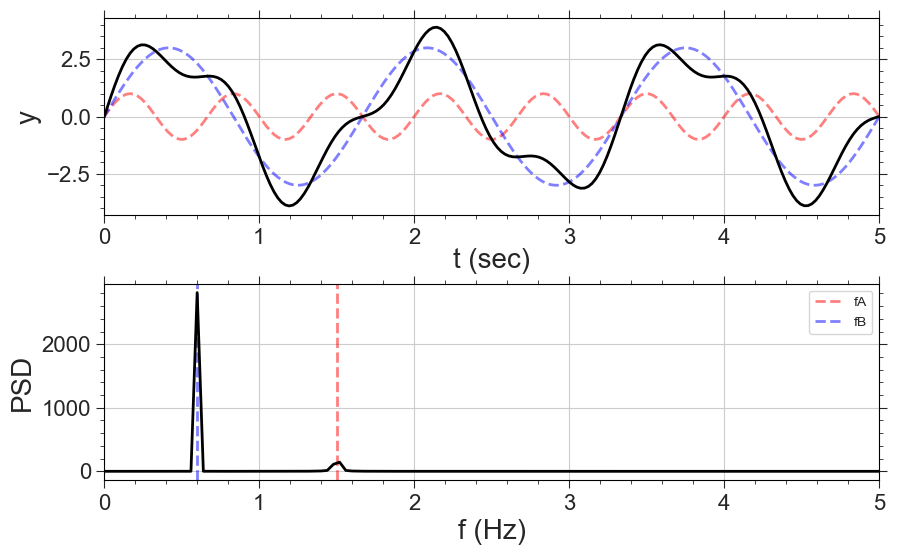

In [34]:
y = 1*yA + 3*yB
fk, PSD = PSD_continuous(t,y)

fig,axs=plt.subplots(nrows=2,figsize=(10,6))
axs[0].plot(t,1*yA,'r--',alpha=0.5)
axs[0].plot(t,3*yB,'b--',alpha=0.5)
axs[0].plot(t,y,'k-')
axs[0].set_xlabel('t (sec)',labelpad=0)
axs[0].set_ylabel('y')
axs[0].set_xlim([0,5])

axs[1].axvline(fA,color='r',ls='--',alpha=0.5,label='fA')
axs[1].axvline(fB,color='b',ls='--',alpha=0.5,label='fB')
axs[1].plot(fk,PSD,'k-')
axs[1].set_xlabel('f (Hz)')
axs[1].set_ylabel('PSD') 
axs[1].set_xlim([0,5])
axs[1].legend()
fig.subplots_adjust(hspace=0.35)

/var/folders/6r/klndhhws02j_5lsrsqgz31d40000gq/T/ipykernel_3713/3152552888.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[1].legend()


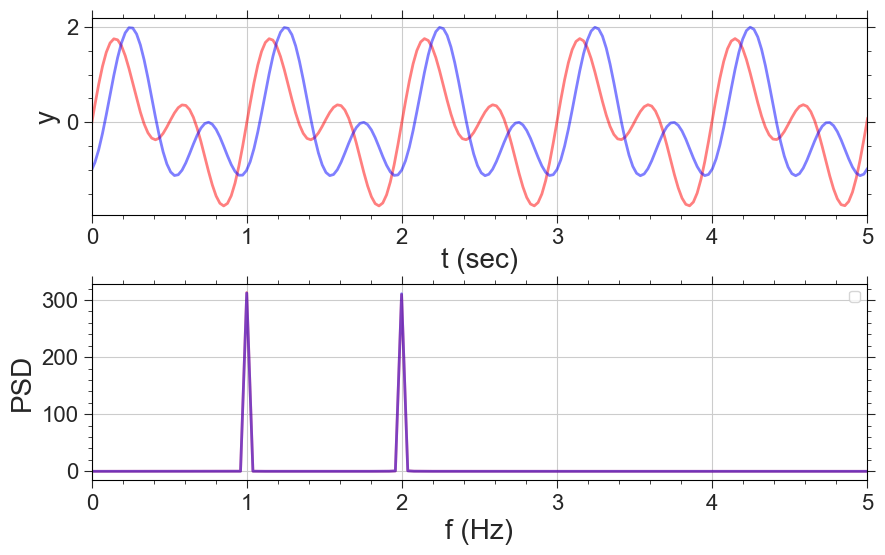

In [35]:
yA = np.sin(2*np.pi*t) + np.sin(4*np.pi*t)
yB = np.sin(2*np.pi*t) - np.cos(4*np.pi*t)
fkA, PSDA = PSD_continuous(t,yA)
fkB, PSDB = PSD_continuous(t,yB)

fig,axs=plt.subplots(nrows=2,figsize=(10,6))
axs[0].plot(t,yA,'r-',alpha=0.5)
axs[0].plot(t,yB,'b-',alpha=0.5)
axs[0].set_xlabel('t (sec)',labelpad=0)
axs[0].set_ylabel('y')
axs[0].set_xlim([0,5])

axs[1].plot(fkA,PSDA,'r-',alpha=0.5)
axs[1].plot(fkB,PSDB,'b-',alpha=0.5)
axs[1].set_xlabel('f (Hz)')
axs[1].set_ylabel('PSD') 
axs[1].set_xlim([0,5])
axs[1].legend()
fig.subplots_adjust(hspace=0.35)

## Discrete Fourier transforms and Nyquist sampling

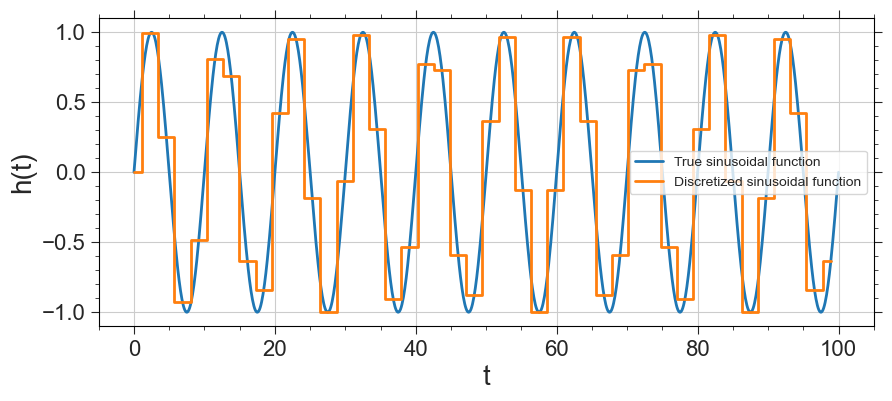

In [125]:
P = 10
dt = 2.3
tj = np.arange(0,10*P,dt)
yj = np.sin(2*np.pi*tj/P)

fig,ax=plt.subplots()
t = np.linspace(0,10*P,1000)
y = np.sin(2*np.pi*t/P)
ax.plot(t,y,label='True sinusoidal function')
ax.plot(tj,yj,drawstyle='steps-mid',label='Discretized sinusoidal function')
ax.set_xlabel('t')
ax.set_ylabel('h(t)')
ax.legend()

In [37]:
# Whittaker=Shannon FFT-based interpolation for band-limited data
def sinc_interpolation_fft(x: np.ndarray, s: np.ndarray, u: np.ndarray) -> np.ndarray:
    """
    Fast Fourier Transform (FFT) based sinc or bandlimited interpolation.
    
    Args:
        x (np.ndarray): signal to be interpolated, can be 1D or 2D
        s (np.ndarray): time points of x (*s* for *samples*) 
        u (np.ndarray): time points of y (*u* for *upsampled*)
        
    Returns:
        np.ndarray: interpolated signal at time points *u*
    """
    num_output = len(u)

    # Compute the FFT of the input signal
    X = np.fft.rfft(x)

    # Create a new array for the zero-padded frequency spectrum
    X_padded = np.zeros(num_output // 2 + 1, dtype=complex)

    # Copy the original frequency spectrum into the zero-padded array
    X_padded[:X.shape[0]] = X

    # Compute the inverse FFT of the zero-padded frequency spectrum
    x_interpolated = np.fft.irfft(X_padded, n=num_output)

    return x_interpolated * (num_output / len(s))

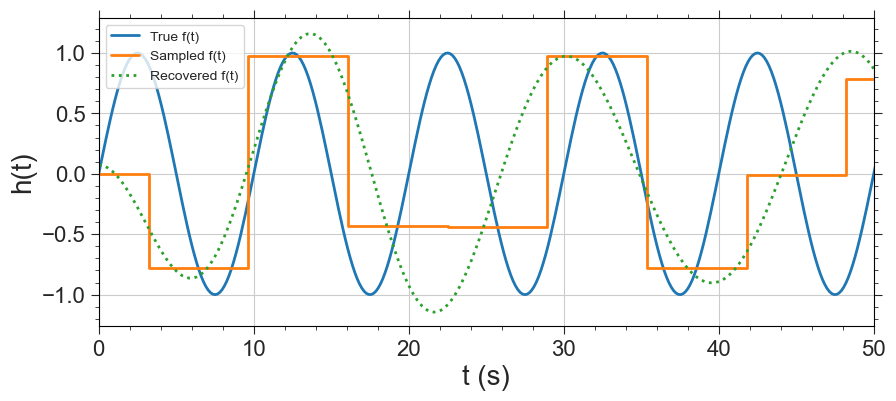

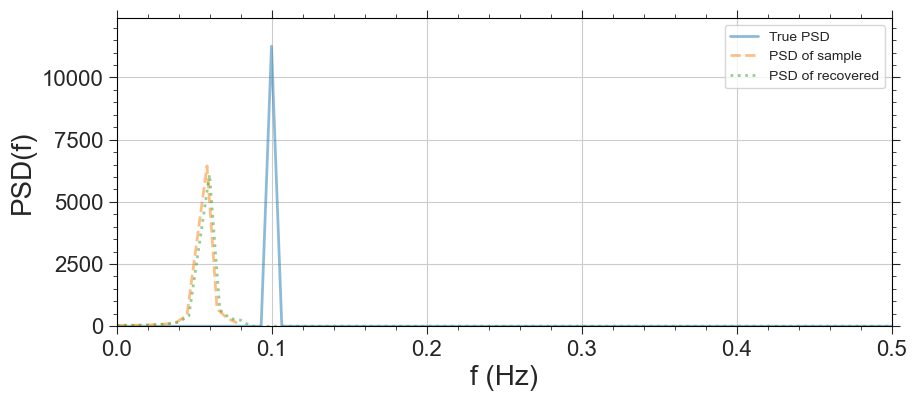

In [127]:
dt = 6.43
# dt = 2.3
P = 10
N_P = 5

N_P_buff = 10
# t = np.linspace(-N_P_buff*P,(N_P+N_P_buff)*P,1000)
t = np.linspace(0,(N_P+N_P_buff)*P,1000)
y = np.sin(2*np.pi*t/P)

# tj=np.arange(-N_P_buff*P,(N_P+N_P_buff)*P,dt)
tj=np.arange(0,(N_P+N_P_buff)*P,dt)
if len(tj) % 2 !=0:
    tj=tj[:-1]

yj = np.sin(2*np.pi*tj/P)
y_fit = sinc_interpolation_fft(yj,tj,t)

fkj,PSDj = PSD_continuous(tj,yj)
fk_true,PSD_true = PSD_continuous(t,y)
fk_fit,PSD_fit = PSD_continuous(t,y_fit)

fig,ax=plt.subplots()
ax.plot(t,y,label='True f(t)')
ax.plot(tj,yj,drawstyle='steps-mid',label='Sampled f(t)')
ax.plot(t,y_fit,':',label='Recovered f(t)')
ax.set_xlim([0,N_P*P])
ax.set_xlabel('t (s)')
ax.set_ylabel('h(t)')
ax.legend()

fig,ax=plt.subplots()
ax.plot(fk_true,PSD_true,alpha=0.5,label='True PSD')
ax.plot(fkj,PSDj,alpha=0.5,ls='--',label='PSD of sample')
ax.plot(fk_fit,PSD_fit,alpha=0.5,ls=':',label='PSD of recovered')
ax.set_xlim([0,5/P])
ax.set_ylim([0,np.max(PSD_true)*1.1])
ax.set_xlabel('f (Hz)')
ax.set_ylabel('PSD(f)')
ax.legend()

## Fourier transforms and convolution

## Fourier transforms and noise

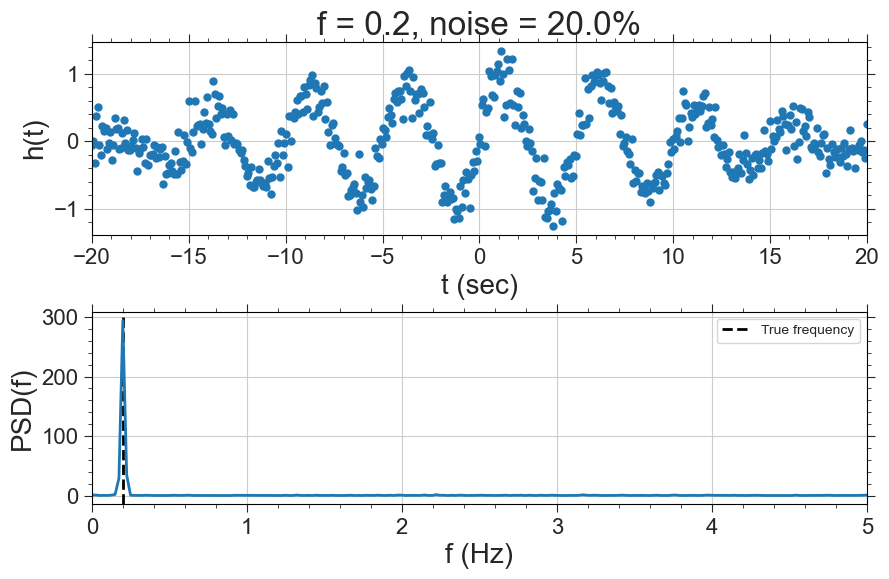

In [131]:
f_true = 0.2

t=np.linspace(-20,20,512)
y=np.sin(2*np.pi*f_true*t)*np.exp(-t**2/(2*10**2))

# noise = 2
noise = 0.2
y_noisy =y+ np.random.normal(0,noise,len(t))

f,PSD = PSD_continuous(t,y_noisy)

fig,axs=plt.subplots(nrows=2,figsize=(10,6))

axs[0].plot(t,y_noisy,'.')
axs[0].set_title(f'f = {f_true}, noise = {noise*100}%')
axs[0].set_xlabel('t (sec)')
axs[0].set_ylabel('h(t)')
axs[0].set_xlim([-20,20])

axs[1].axvline(f_true,color='k',ls='--',label='True frequency')
axs[1].plot(f,PSD)
axs[1].set_xlabel('f (Hz)')
axs[1].set_ylabel('PSD(f)') 
# axs[1].set_xlim([np.min(f),np.max(f)])
axs[1].set_xlim([0,5])
axs[1].legend()
fig.subplots_adjust(hspace=0.4)




Text(0, 0.5, 'h(t)')

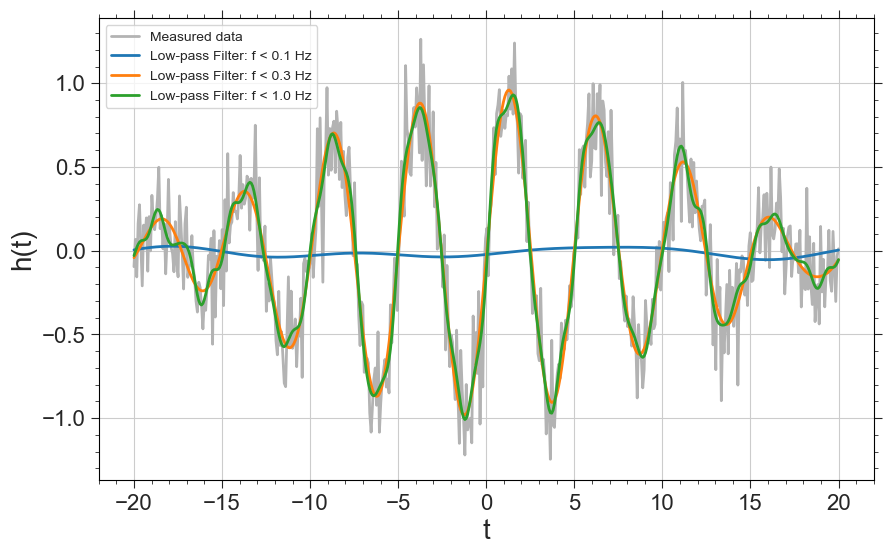

In [124]:
# Filter high-frequency noise from spectrum with Fourier modes

fig,ax=plt.subplots(figsize=(10,6))
ax.plot(t,y_noisy,'-',color='0.7',label='Measured data')

for fi in [0.1,0.3,1.0]:
    k = np.argmin(np.abs(f-fi))
    y_fft = fftpack.fft(y_noisy) # compute the Fourier transform
    y_fft[k + 1:-k] = 0 # zero-out frequencies higher than k
    y_fit = fftpack.ifft(y_fft).real # compute the amplitudes from the truncated series

    trunc_amp = y_fit
    ax.plot(t,trunc_amp,ls='-',label=f'Low-pass Filter: f < {fi} Hz')

ax.legend()
# ax.set_xlim([0,2])
ax.set_xlabel('t')
ax.set_ylabel('h(t)')


### Irregular time sampling

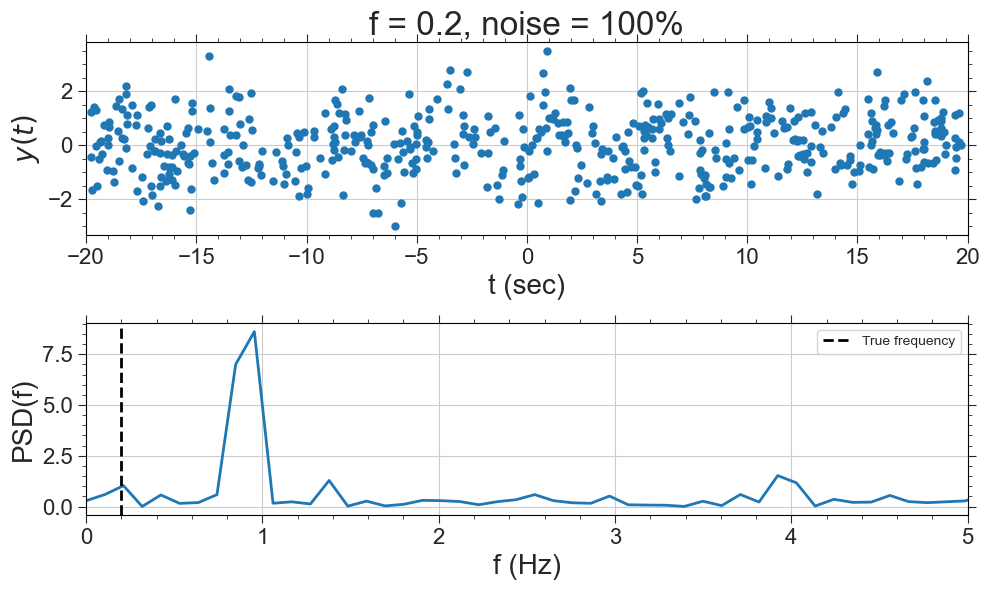

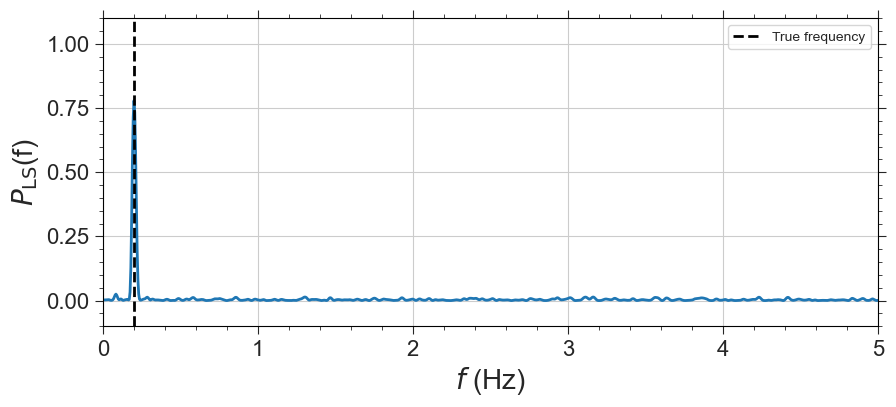

In [138]:
np.random.seed(42)
f_true = 0.2

t=np.sort(20*np.random.uniform(-1,1,512))
y=np.sin(2*np.pi*f_true*t)*np.exp(-t**2/(2*10**2))

noise = 1
y_noisy = y + np.random.normal(0,noise,len(t))

f,PSD = PSD_continuous(t,y_noisy)

fig,axs=plt.subplots(nrows=2,figsize=(10,6))

axs[0].plot(t,y_noisy,'.')
axs[0].set_title(f'f = {f_true}, noise = {noise*100}%')
axs[0].set_xlabel('t (sec)')
axs[0].set_ylabel('$y(t)$')
axs[0].set_xlim([-20,20])

axs[1].plot(f,PSD)
axs[1].axvline(f_true,color='k',ls='--',label='True frequency')
axs[1].set_xlabel('f (Hz)')
axs[1].set_ylabel('PSD(f)') 
# axs[1].set_xlim([np.min(f),np.max(f)])
axs[1].set_xlim([0,5])
axs[1].legend()
fig.tight_layout()


from astropy.timeseries import LombScargle
omega,P_LS = LombScargle(t, y).autopower()
fig,ax=plt.subplots()

# ax.fill(omega, P_LS, fc='gray', ec='gray',label='Perfect sampling')
ax.plot(omega, P_LS)
ax.axvline(f_true,color='k',ls='--',label='True frequency')
ax.set_ylim(-0.1, 1.1)
ax.set_xlim(omega[0],omega[-1])
ax.set_xlabel('$f$ (Hz)')
ax.set_ylabel(r'$P_{\rm LS}$(f)')
ax.set_xlim([0,5])
ax.legend()


## Lomb-Scargle periodograms

Text(0, 0.5, '$y(t)$')

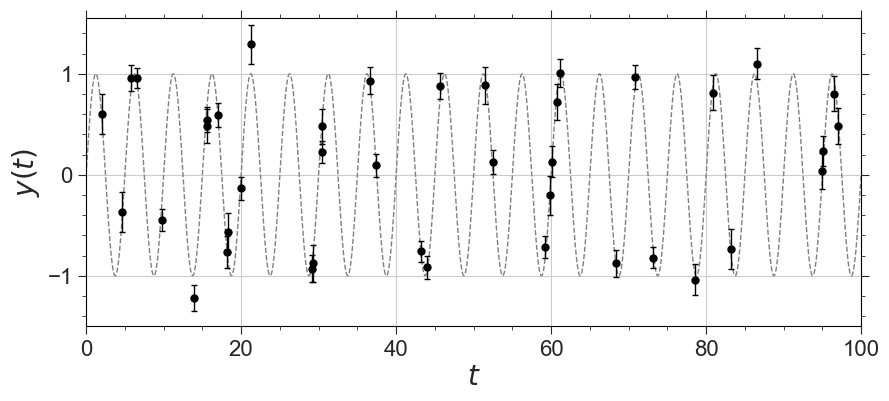

In [105]:
# from astropy.timeseries import LombScargle

# generate fake data
np.random.seed(42)
f_true = 0.2
t_obs = 100 * np.random.random(40)  # 40 observations in 100 days

# censor observations between 60 and 80 days
idx = (t_obs < 60) | (t_obs > 80)
t_obs = t_obs[idx]

# define observed y values with noise
y_obs1 = np.sin(2*np.pi * f_true * t_obs)
dy1 = 0.1 + 0.1 * np.random.random(y_obs1.shape)
y_obs1 += np.random.normal(0, dy1)

y_window = np.ones_like(y_obs1)

t = np.linspace(0, 100, 10000)
y = np.sin(2*np.pi * f_true * t)

# Compute the periodogram
omega = np.linspace(0, 5, 1001)[1:]
# P_obs1 = LombScargle(t_obs, y_obs1, dy1, omega)
# P_window = LombScargle(t_obs, y_window, 1, omega)
# P_true = LombScargle(t, y, 1, omega)

omega /= 2 * np.pi

fig,ax=plt.subplots()
ax.plot(t, y, '--', c='gray',lw=1)
ax.errorbar(t_obs, y_obs1, dy1, fmt='.k', capsize=2, elinewidth=1)
ax.set_xlim(0, 100)
ax.set_ylim(-1.5, 1.55)
ax.set_xlabel('$t$')
ax.set_ylabel('$y(t)$')



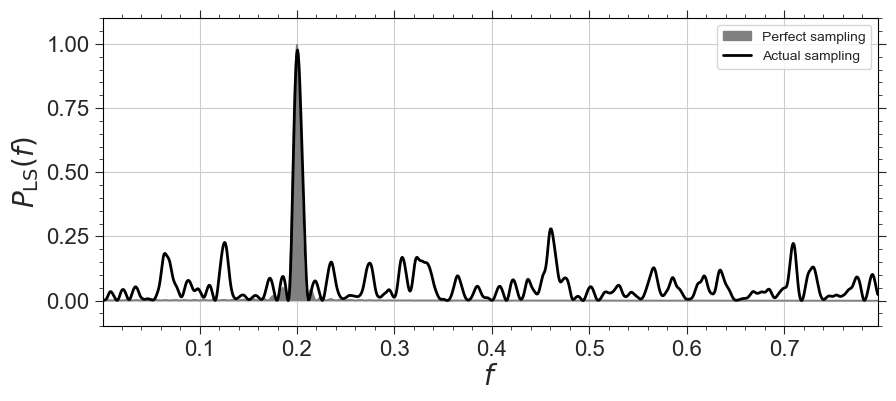

In [106]:

P_LS_true = LombScargle(t, y,fit_mean=False).power(omega)
P_LS_obs1 = LombScargle(t_obs, y_obs1, dy1,fit_mean=False).power(omega)

fig,ax=plt.subplots()

ax.fill(omega, P_LS_true, fc='gray', ec='gray',label='Perfect sampling')
ax.plot(omega, P_LS_obs1, '-', c='black',label='Actual sampling')
ax.set_ylim(-0.1, 1.1)
ax.set_xlim(omega[0],omega[-1])
ax.set_xlabel('$f$')
ax.set_ylabel(r'$P_{\rm LS}(f)$')
ax.legend()


# Generalized Lomb-Scargle periodogram 

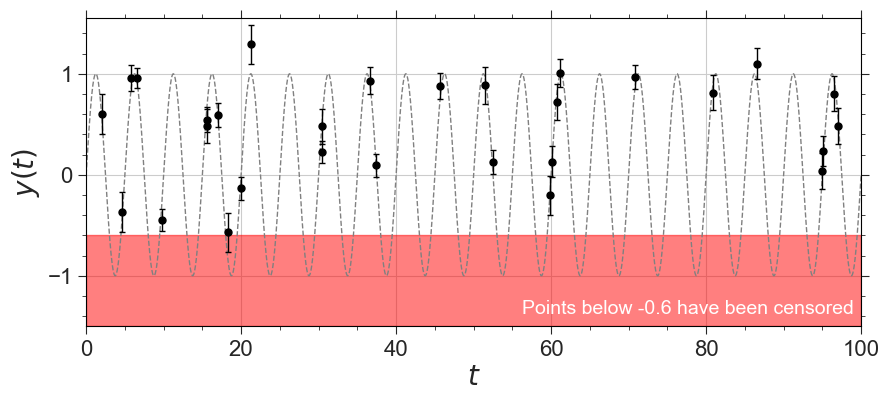

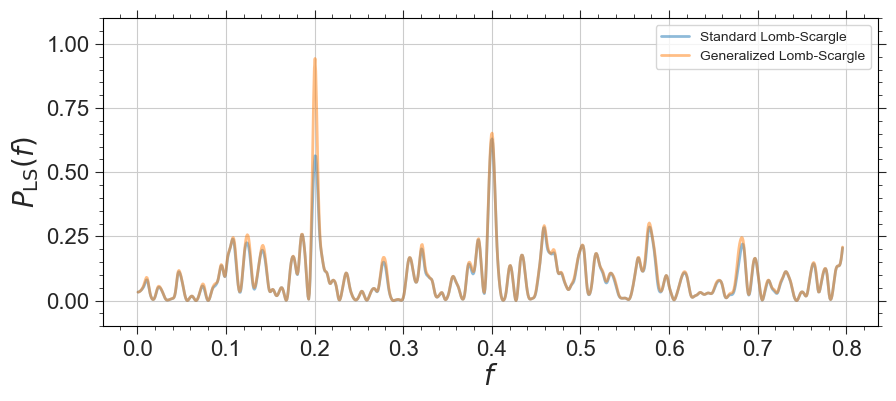

In [113]:
min_y = -0.6
idx = y_obs1 > min_y
t_obs2 = t_obs[idx]
y_obs2 = y_obs1[idx]
dy2 = dy1[idx]

# Compute the periodogram
P_LS_obs2_fixd = LombScargle(t_obs2, y_obs2, dy2,fit_mean=False).power(omega)
P_LS_obs2_gnrl = LombScargle(t_obs2, y_obs2, dy2,fit_mean=True).power(omega)

fig,ax=plt.subplots()
ax.plot(t, y, '--', c='gray',lw=1)
ax.errorbar(t_obs2, y_obs2, dy2, fmt='.k', capsize=2, elinewidth=1)
ax.set_xlim(0, 100)
ax.set_ylim(-1.5, 1.55)
ax.axhspan(-1.5,min_y,color='r',alpha=0.5)
ax.text(0.99,0.04,f'Points below {min_y} have been censored',transform=ax.transAxes,ha='right',color='w',size=14)
ax.set_xlabel('$t$')
ax.set_ylabel('$y(t)$')

fig,ax=plt.subplots()
ax.plot(omega, P_LS_obs2_fixd, alpha = 0.5, label='Standard Lomb-Scargle')
ax.plot(omega, P_LS_obs2_gnrl, alpha=0.5,label='Generalized Lomb-Scargle')
ax.set_ylim(-0.1, 1.1)
# ax.set_xlim(omega[0],omega[-1])
ax.set_xlabel('$f$')
ax.set_ylabel(r'$P_{\rm LS}(f)$')
ax.legend()


Note also the `nterms` option of `LombScargle` that allows fitting a Truncated Fourier Series instead of a single sinusoid---this may be important for non-sinusoidal periodic behaviors.

# Part 2: Stochastic Autoregressive Models

/var/folders/6r/klndhhws02j_5lsrsqgz31d40000gq/T/ipykernel_3713/3693378546.py:39: RuntimeWarning: divide by zero encountered in divide
  ax.plot(fk,1/(fk/1e-2)**i,color=curve[0].get_color())


Text(0, 0.5, 'PSD(f)')

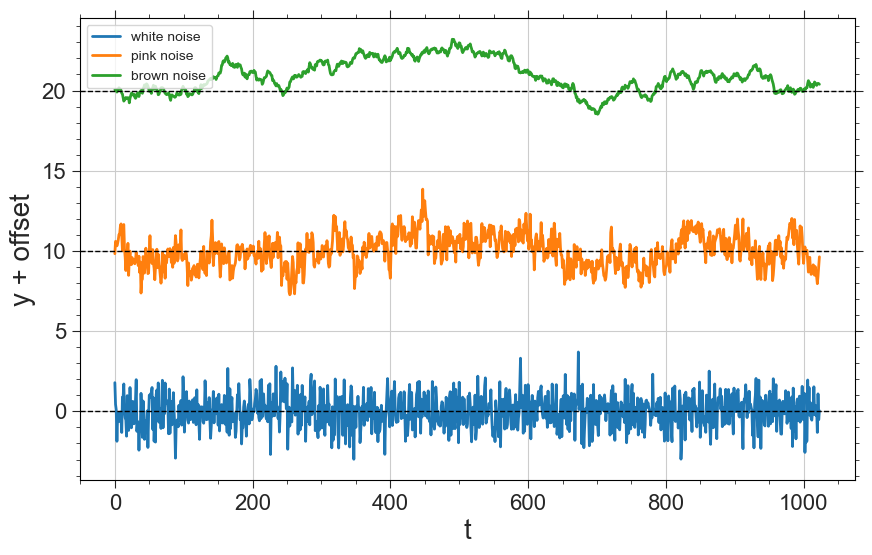

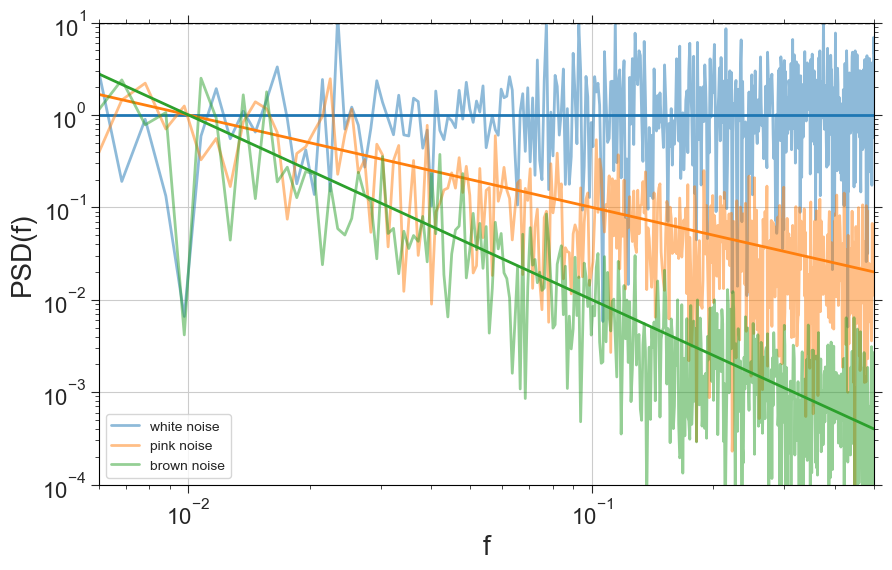

In [117]:
np.random.seed(3)

n=1024
# t = np.linspace(0,10,n)
t = np.arange(n)

# White noise
y_wt = np.random.normal(0,1,n)

# Pink noise
y_orig = np.random.normal(0,1,n)
y_fft = fftpack.fft(y_orig) # compute the FFT
f_fft = fftpack.fftfreq(n)  # compute the frequencies of the FFT
y_fft[f_fft!=0] *= 1/np.sqrt(np.abs(f_fft[f_fft!=0]))   # scale the FFT by the square-root of the frequencies
y_fft[0] = 0
y_pk = fftpack.ifft(y_fft).real # compute the amplitudes from the truncated series

# Brown (or red) noise
y_orig = np.random.normal(0,1,n)
y_br = np.cumsum(y_orig)

y_dict = {'white noise':y_wt,
          'pink noise':y_pk/np.std(y_pk),
          'brown noise':y_br/np.std(y_br)}

fig,ax=plt.subplots(figsize=(10,6))
for i,key in enumerate(y_dict.keys()):
    ax.plot(t,y_dict[key]+i*10,label=key)
    ax.axhline(i*10,color='k',lw=1,ls='--')
ax.legend()
ax.set_xlabel('t')
ax.set_ylabel('y + offset')

fig,ax=plt.subplots(figsize=(10,6))
for i,key in enumerate(y_dict.keys()):
    fk,PSD = PSD_continuous(t,y_dict[key])
    PSD = PSD/np.median(PSD[np.abs(fk-1e-2)<7e-3])
    curve=ax.plot(fk,PSD,label=key,alpha=0.5)
    ax.plot(fk,1/(fk/1e-2)**i,color=curve[0].get_color())
    ax.axhline(i*10,color='k',lw=1,ls='--')
ax.loglog()
ax.set_xlim(6e-3,5e-1)
ax.set_ylim(1e-4,1e1)
ax.legend()
ax.set_xlabel('f')
ax.set_ylabel('PSD(f)')


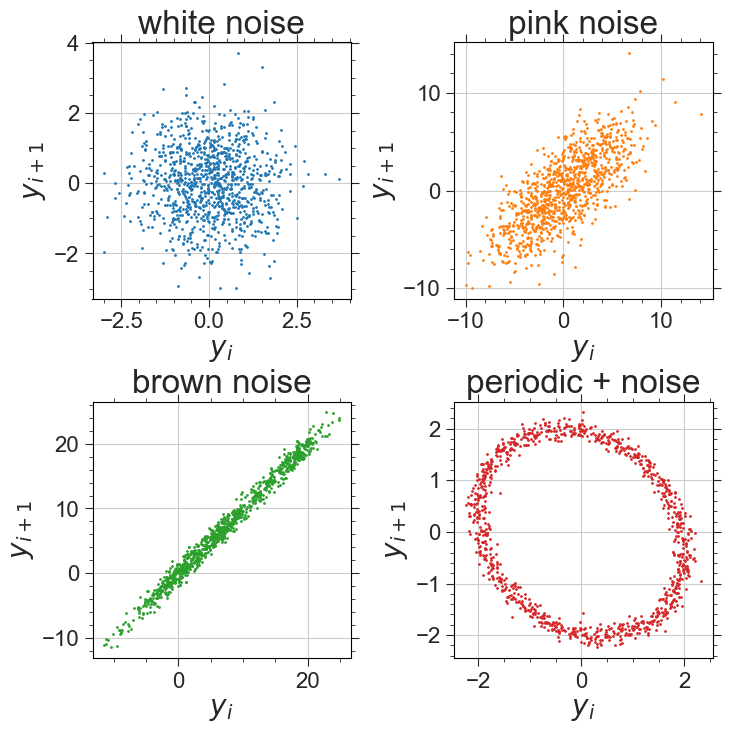

In [73]:
fig,axs=plt.subplots(nrows=2,ncols=2,figsize=(8,8))
axs=axs.flatten()

axs[0].plot(y_wt[:-1],y_wt[1:],'.',ms=2,color='tab:blue')
axs[0].set_title('white noise')
axs[0].set_xlabel('$y_i$')
axs[0].set_ylabel('$y_{i+1}$')
axs[0].axis('equal')

axs[1].plot(y_pk[:-1],y_pk[1:],'.',ms=2,color='tab:orange')
axs[1].set_title('pink noise')
axs[1].set_xlabel('$y_i$')
axs[1].set_ylabel('$y_{i+1}$')
axs[1].axis('equal')

axs[2].plot(y_br[:-1],y_br[1:],'.',ms=2,color='tab:green')
axs[2].set_title('brown noise')
axs[2].set_xlabel('$y_i$')
axs[2].set_ylabel('$y_{i+1}$')
axs[2].axis('equal')

t_pd = np.arange(1024)
y_pd=2*np.sin(2*np.pi*0.281*t_pd) + np.random.normal(0,0.1,len(t_pd))
axs[3].plot(y_pd[:-1],y_pd[1:],'.',ms=2,color='tab:red')
axs[3].set_title('periodic + noise')
axs[3].set_xlabel('$y_i$')
axs[3].set_ylabel('$y_{i+1}$')
axs[3].axis('equal')

fig.subplots_adjust(wspace=0.4,hspace=0.4)


In [51]:
# plt.plot(y_pd[:10])

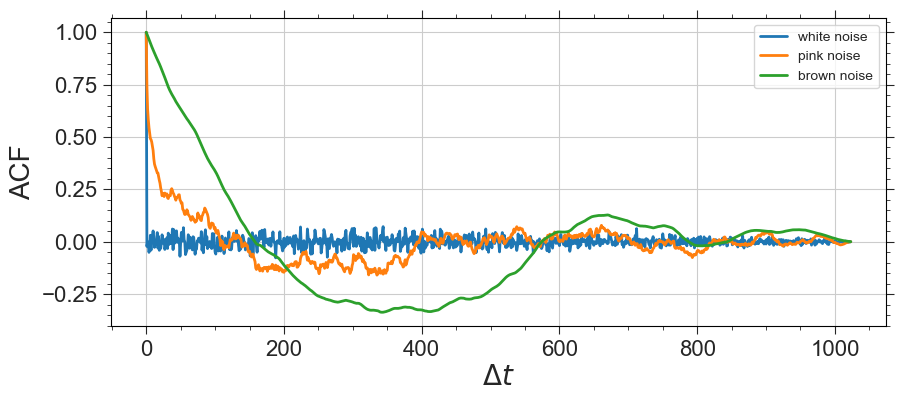

In [76]:
def ACF(y):
    n = len(y)
    ybar = np.mean(y)
    acov = np.zeros(n)
    for j in range(n):
        acov[j] = np.sum([(y[i]-ybar)*(y[i+j]-ybar) for i in range(n-j)])

    return acov/np.sum((y-ybar)**2)

ACF_wt = ACF(y_wt)
ACF_pk = ACF(y_pk)
ACF_br = ACF(y_br)
ACF_pd = ACF(y_pd)


fig,ax=plt.subplots()
ax.plot(t,ACF_wt,label='white noise')
ax.plot(t,ACF_pk,label='pink noise')
ax.plot(t,ACF_br,label='brown noise')
# ax.plot(t,ACF_pd,label='periodic + noise')
ax.set_xlabel('$\\Delta t$')
ax.set_ylabel('ACF')
ax.legend()